# TON IOT

### Carga y Limpieza

In [2]:
from DataLoader import DataLoader
from DataProcessor import DataProcessor
import pandas as pd

Loader = DataLoader()

In [3]:
df1 = Loader.load_dataset("../data/Network_dataset_1.csv", file_type="csv")
df2 = Loader.load_dataset("../data/Network_dataset_9.csv", file_type="csv")

df = pd.concat([df1, df2], ignore_index=True)

2025-09-05 10:07:05,010 - INFO - CSV file loaded successfully:           src_ip  src_port         dst_ip  dst_port proto service  \
0    3.122.49.24      1883  192.168.1.152     52976   tcp       -   
1   192.168.1.79     47260  192.168.1.255     15600   udp       -   
2  192.168.1.152      1880  192.168.1.152     51782   tcp       -   
3  192.168.1.152     34296  192.168.1.152     10502   tcp       -   
4  192.168.1.152     46608  192.168.1.190        53   udp     dns   

       duration src_bytes  dst_bytes conn_state  ...  http_response_body_len  \
0  80549.530260   1762852   41933215        OTH  ...                       0   
1      0.000000         0          0         S0  ...                       0   
2      0.000000         0          0        OTH  ...                       0   
3      0.000000         0          0        OTH  ...                       0   
4      0.000549         0        298        SHR  ...                       0   

   http_status_code  http_user_agent  htt

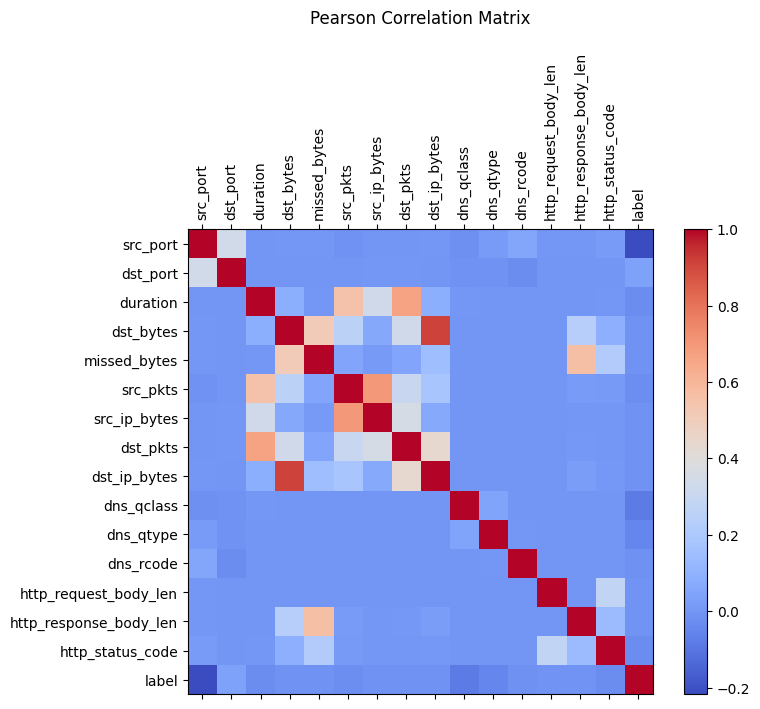

In [4]:
import matplotlib.pyplot as plt
import numpy as np
df_num = df.select_dtypes(include=[np.number])
corr = df_num.corr(method='pearson')

plt.figure(figsize=(8,6))
plt.matshow(corr, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Pearson Correlation Matrix", pad=20)
plt.show()

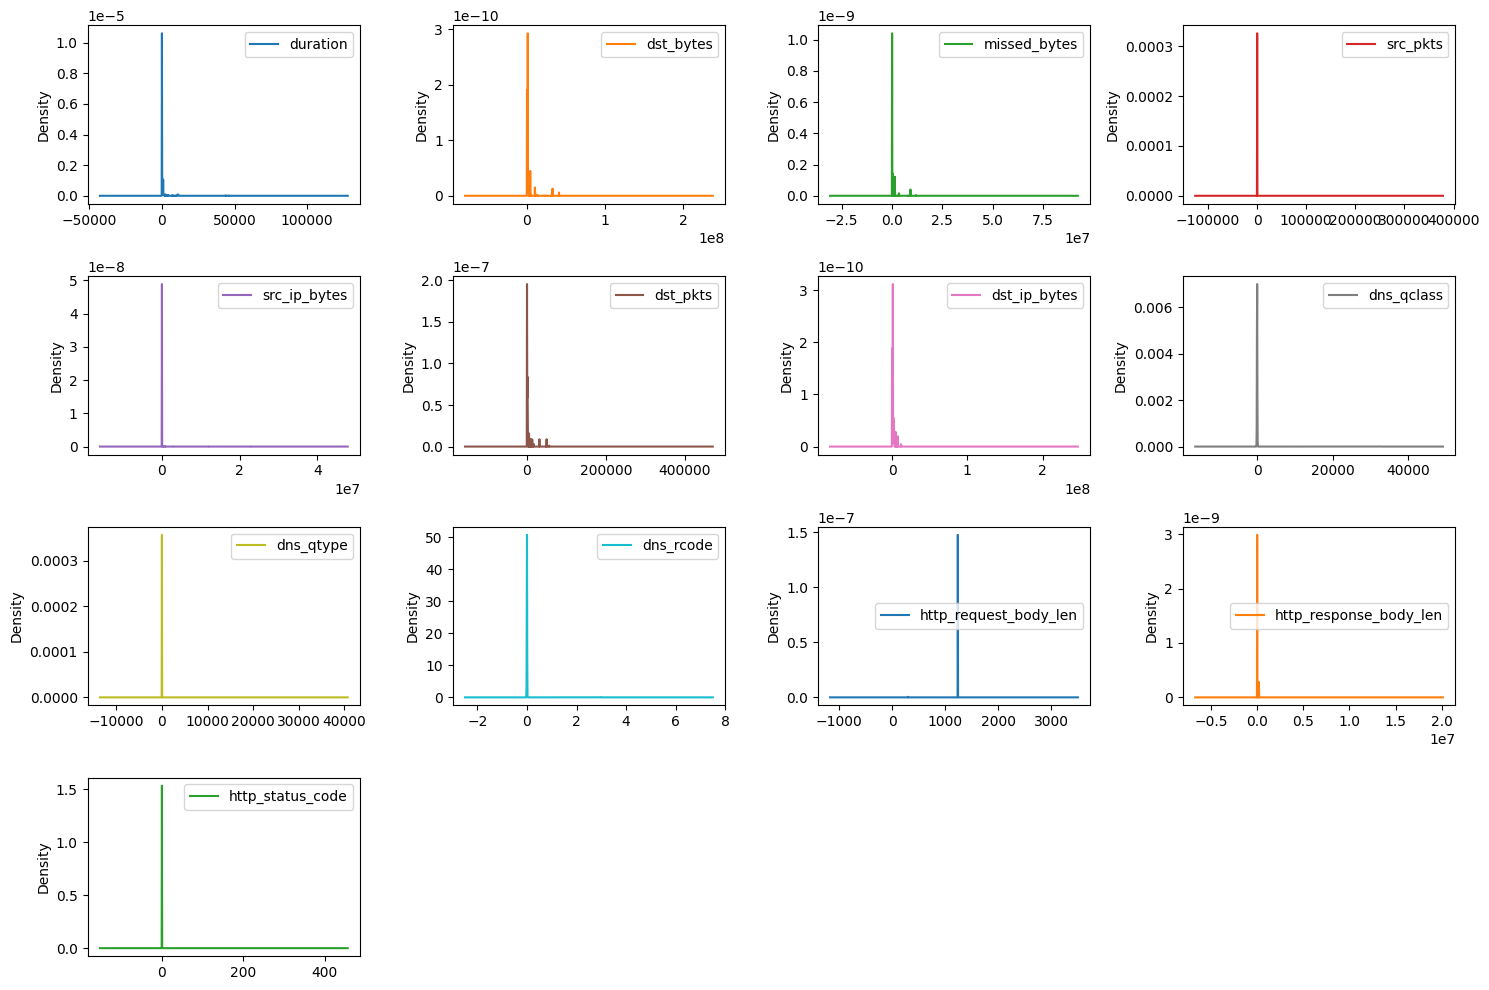

In [7]:
df_num = df_num.loc[:, df_num.std() > 0]
df_num = df_num.drop(columns=['src_port', 'dst_port', 'label'], errors='ignore')
df_num.plot(kind="density", subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

In [9]:
# Display the first few rows of the DataFrame
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,...,0,0,-,-,-,-,-,-,0,normal
2,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,...,0,0,-,-,-,-,-,-,0,normal
4,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [11]:
# Observe the DataFrame structure and types to check for any inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 45 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   src_ip                  object 
 1   src_port                int64  
 2   dst_ip                  object 
 3   dst_port                int64  
 4   proto                   object 
 5   service                 object 
 6   duration                float64
 7   src_bytes               object 
 8   dst_bytes               int64  
 9   conn_state              object 
 10  missed_bytes            int64  
 11  src_pkts                int64  
 12  src_ip_bytes            int64  
 13  dst_pkts                int64  
 14  dst_ip_bytes            int64  
 15  dns_query               object 
 16  dns_qclass              int64  
 17  dns_qtype               int64  
 18  dns_rcode               int64  
 19  dns_AA                  object 
 20  dns_RD                  object 
 21  dns_RA                  object 

In [12]:
# Avoid cleaning duplicates because it removes a lot of data and there are no identifiers that avoid the existance of duplicates by chance
# df = Loader.clean_dataset(df)

In [13]:
# plot frequencies
df["label"].value_counts(normalize=True)

label
1    0.883291
0    0.116709
Name: proportion, dtype: float64

In [14]:
df["type"].value_counts()

type
dos         975261
scanning    791321
normal      233418
Name: count, dtype: int64

In [15]:
# We take onlu the following columns
features = [
    "duration", 
    "src_bytes", "dst_bytes", 
    "src_pkts", "dst_pkts",
    "src_ip_bytes", "dst_ip_bytes"
]

X = df[features]
y = df["label"].astype("Int64")

In [17]:
X.head()

,duration,src_bytes,dst_bytes,src_pkts,dst_pkts,src_ip_bytes,dst_ip_bytes
0,80549.530260,1762852,41933215,252181,2,14911156,236
1,0.000000,0,0,1,0,63,0
2,0.000000,0,0,0,0,0,0
3,0.000000,0,0,0,0,0,0
4,0.000549,0,298,0,2,0,354


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: Int64

In [19]:
for col in ["duration", "src_bytes", "dst_bytes", "src_pkts", "dst_pkts",
            ]:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# divide categorial and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

/tmp/ipykernel_13066/2898869028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors="coerce")


In [20]:
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['duration', 'src_bytes', 'dst_bytes', 'src_pkts', 'dst_pkts', 'src_ip_bytes', 'dst_ip_bytes']
Categorical columns: []


In [21]:
# Look at the distribution of the labels to check for class imbalance
print(y.value_counts(normalize=True))

label
1    0.883291
0    0.116709
Name: proportion, dtype: Float64


### Validation

In [22]:
# import data processor
processor = DataProcessor()

In [23]:
from sklearn.model_selection import StratifiedKFold
# Define the outer and inner cross-validation strategies
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [24]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import kruskal
import numpy as np

# Define the Kruskal-Wallis score function for feature selection
# This function computes the Kruskal-Wallis H statistic for each feature
def kruskal_wallis_score(X, y):
    scores = []
    pvalues = []
    for i in range(X.shape[1]):
        groups = [X[y == cls, i] for cls in np.unique(y)]
        try:
            stat, p = kruskal(*groups)
        except ValueError:
            stat, p = 0, 1
        scores.append(stat)
        pvalues.append(p)
    return np.array(scores), np.array(pvalues)

In [25]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import kruskal
import numpy as np

# Define the Kruskal-Wallis score function for feature selection
# This function computes the Kruskal-Wallis H statistic for each feature
def kruskal_wallis_score(X, y):
    scores = []
    pvalues = []
    for i in range(X.shape[1]):
        groups = [X[y == cls, i] for cls in np.unique(y)]
        try:
            stat, p = kruskal(*groups)
        except ValueError:
            stat, p = 0, 1
        scores.append(stat)
        pvalues.append(p)
    return np.array(scores), np.array(pvalues)

In [26]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  
from sklearn.metrics import matthews_corrcoef, brier_score_loss, confusion_matrix, classification_report
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
import time, sys
import joblib, os
from sklearn.base import clone
import pickle

# Define the feature selectors
feature_selectors = {
    "anova": SelectKBest(score_func=f_classif),
    "kruskal": SelectKBest(score_func=kruskal_wallis_score)
}

from sklearn.model_selection import RandomizedSearchCV

models = {
    "XGBoost": {
        "estimator": XGBClassifier(eval_metric="logloss", use_label_encoder=False),
        "param_grid": {
            "select__k": [5, 15],
            "clf__n_estimators": [100, 300],
            "clf__max_depth": [5, None],
            "clf__learning_rate": [0.05, 0.1]
        }
    },
    "RandomForest": {
        "estimator": RandomForestClassifier(),
        "param_grid": {
            "select__k": [5, 15],
            "clf__n_estimators": [100, 300],
            "clf__max_depth": [None, 10]
        }
    },
    "MLPClassifier": {
        "estimator": MLPClassifier(max_iter=300, random_state=42),
        "param_grid": {
            "select__k": [5, 15],
            "clf__hidden_layer_sizes": [(50,), (100,)],
            "clf__activation": ["relu"],
            "clf__alpha": [0.0001, 0.001]
        }
    }
}

results = []
preds = {}
for selector in feature_selectors.keys():
    print(f"\nTesting Feature Selector: {selector}...")
    selector_instance = feature_selectors[selector]

    for model, configuration in models.items():
        print(f"\n Testing Model: {model}...")
        estimator = configuration["estimator"]
        param_grid = configuration["param_grid"]

        outer_scores = {"f1": [], "roc_auc": [], "auprc": [], "mcc": [], 
                        "brier": [], "fnr": [], "training_time": [], "size": []}
        best_params_folds, best_features_folds = [], []
        confusion_matrixes, classification_reports = [], []

        for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            pipe = Pipeline([
                ("pre", DataProcessor(num_cols, cat_cols)),
                ("select", clone(selector_instance)),
                ("clf", estimator)
            ])

            search = RandomizedSearchCV(
                pipe,
                param_distributions=param_grid,
                n_iter=8,                  # menos combinaciones
                scoring="f1",
                cv=inner_cv,               # inner_cv reducido (3)
                n_jobs=-1,
                random_state=42
            )

            start = time.perf_counter()
            search.fit(X_train, y_train)
            train_time = time.perf_counter() - start

            best_model = search.best_estimator_
            best_params_folds.append(search.best_params_)

            y_pred = best_model.predict(X_test)
            if f"{model}_{selector}" not in preds:
                preds[f"{model}_{selector}"] = np.zeros_like(y)

            preds[f"{model}_{selector}"][test_idx] = y_pred

            y_proba = best_model.predict_proba(X_test)[:, 1]

            # Metrics
            outer_scores["f1"].append(f1_score(y_test, y_pred))
            outer_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))
            outer_scores["auprc"].append(average_precision_score(y_test, y_proba))
            outer_scores["mcc"].append(matthews_corrcoef(y_test, y_pred))
            outer_scores["brier"].append(brier_score_loss(y_test, y_proba))
            outer_scores["training_time"].append(train_time)

            # Best Features
            select_step = best_model.named_steps["select"]
            feature_names = best_model.named_steps["pre"].get_feature_names_out()
            selected_mask = select_step.get_support()
            selected_features = feature_names[selected_mask]
            best_features_folds.append(list(selected_features))

            # Confusion matrix & report
            cm = confusion_matrix(y_test, y_pred, labels=[0,1])
            tn, fp, fn, tp = cm.ravel()
            fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
            outer_scores["fnr"].append(fnr)
            confusion_matrixes.append(cm)

            report = classification_report(
                y_test, y_pred,
                target_names=["Benigno (0)", "Malicioso (1)"],
                output_dict=True
            )
            classification_reports.append(report)

            size_bytes = sys.getsizeof(pickle.dumps(best_model))
            outer_scores["size"].append(size_bytes / 1024)

        results.append({
            "Modelo": f"{model}_{selector}",
            "F1": f"{np.mean(outer_scores['f1']):.3f} ± {np.std(outer_scores['f1']):.3f}",
            "ROC-AUC": f"{np.mean(outer_scores['roc_auc']):.3f} ± {np.std(outer_scores['roc_auc']):.3f}",
            "AUPRC": f"{np.mean(outer_scores['auprc']):.3f} ± {np.std(outer_scores['auprc']):.3f}",
            "MCC": f"{np.mean(outer_scores['mcc']):.3f} ± {np.std(outer_scores['mcc']):.3f}",
            "Brier": f"{np.mean(outer_scores['brier']):.3f} ± {np.std(outer_scores['brier']):.3f}",
            "FNR": f"{np.mean(outer_scores['fnr']):.3f} ± {np.std(outer_scores['fnr']):.3f}",
            "TrainTime (s)": f"{np.mean(outer_scores['training_time']):.2f} ± {np.std(outer_scores['training_time']):.2f}",
            "ModelSize (KB)": f"{np.mean(outer_scores['size']):.1f} ± {np.std(outer_scores['size']):.1f}",
            "FeatureSelector": selector,
            "BestParams_por_fold": best_params_folds,
            "BestFeatures_por_fold": best_features_folds,
            "ConfusionMatrix_por_fold": confusion_matrixes,
            "ClassificationReport_por_fold": classification_reports
        })

df_results = pd.DataFrame(results)
print("\nFinal Results:")
print(df_results[["Modelo", "F1", "ROC-AUC", "AUPRC", "MCC", "Brier", "FNR", "TrainTime (s)", "ModelSize (KB)"]])

for _, row in df_results.iterrows():
    modelo = row["Modelo"]
    selector = row["FeatureSelector"]
    features_folds = row["BestFeatures_por_fold"]

    all_feats = [feat for fold_feats in features_folds for feat in fold_feats]
    feat_counts = pd.Series(all_feats).value_counts()

    print(f"\n{modelo} ({selector})")
    print("Features más seleccionadas:")
    print(feat_counts)




Testing Feature Selector: anova...

 Testing Model: XGBoost...

 Testing Model: RandomForest...

 Testing Model: MLPClassifier...

Testing Feature Selector: kruskal...

 Testing Model: XGBoost...

 Testing Model: RandomForest...

 Testing Model: MLPClassifier...

Final Results:
                  Modelo             F1        ROC-AUC          AUPRC  \
0          XGBoost_anova  0.999 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   
1     RandomForest_anova  1.000 ± 0.000  1.000 ± 0.000  1.000 ± 0.000   
2    MLPClassifier_anova  0.998 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   
3        XGBoost_kruskal  0.999 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   
4   RandomForest_kruskal  1.000 ± 0.000  1.000 ± 0.000  1.000 ± 0.000   
5  MLPClassifier_kruskal  0.998 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   

             MCC          Brier            FNR     TrainTime (s)  \
0  0.995 ± 0.000  0.001 ± 0.000  0.001 ± 0.000      26.69 ± 0.89   
1  0.998 ± 0.000  0.000 ± 0.000  0.000 ± 0.000    254.59 ± 44.24   
2  0

In [27]:
print("\nFinal Results:")
print(df_results[["Modelo", "F1", "ROC-AUC", "AUPRC", "MCC", "Brier", "FNR", "TrainTime (s)", "ModelSize (KB)"]])


Final Results:
                  Modelo             F1        ROC-AUC          AUPRC  \
0          XGBoost_anova  0.999 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   
1     RandomForest_anova  1.000 ± 0.000  1.000 ± 0.000  1.000 ± 0.000   
2    MLPClassifier_anova  0.998 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   
3        XGBoost_kruskal  0.999 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   
4   RandomForest_kruskal  1.000 ± 0.000  1.000 ± 0.000  1.000 ± 0.000   
5  MLPClassifier_kruskal  0.998 ± 0.000  0.999 ± 0.000  1.000 ± 0.000   

             MCC          Brier            FNR     TrainTime (s)  \
0  0.995 ± 0.000  0.001 ± 0.000  0.001 ± 0.000      26.69 ± 0.89   
1  0.998 ± 0.000  0.000 ± 0.000  0.000 ± 0.000    254.59 ± 44.24   
2  0.984 ± 0.001  0.003 ± 0.000  0.001 ± 0.000  1988.96 ± 220.58   
3  0.995 ± 0.000  0.001 ± 0.000  0.001 ± 0.000      25.30 ± 0.54   
4  0.998 ± 0.000  0.000 ± 0.000  0.000 ± 0.000     228.81 ± 9.38   
5  0.985 ± 0.000  0.003 ± 0.000  0.001 ± 0.000  2135.04 ± 202.21

In [28]:
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_test(y_true, preds1, preds2):
    b = np.sum((preds1 == y_true) & (preds2 != y_true))
    c = np.sum((preds1 != y_true) & (preds2 == y_true))
    table = [[0, b],[c, 0]]
    result = mcnemar(table, exact=False, correction=True)
    return result.statistic, result.pvalue


pairs = [
    ("XGBoost_anova", "RandomForest_anova"),
    ("XGBoost_anova", "MLPClassifier_anova"),
    ("RandomForest_anova", "MLPClassifier_anova"),
    ("XGBoost_kruskal", "RandomForest_kruskal"),
    ("XGBoost_kruskal", "MLPClassifier_kruskal"),
    ("RandomForest_kruskal", "MLPClassifier_kruskal"),
    ("XGBoost_anova", "XGBoost_kruskal"),
    ("RandomForest_anova", "RandomForest_kruskal"),
    ("MLPClassifier_anova", "MLPClassifier_kruskal")
]

rows = []
for m1, m2 in pairs:
    stat, pval = mcnemar_test(y, preds[m1], preds[m2])
    rows.append({"Modelo 1": m1, "Modelo 2": m2,
                 "Estadístico": f"{stat:.3f}", "p-valor": f"{pval:.5f}"})

df_mcnemar = pd.DataFrame(rows)
print(df_mcnemar)

               Modelo 1               Modelo 2 Estadístico  p-valor
0         XGBoost_anova     RandomForest_anova     860.928  0.00000
1         XGBoost_anova    MLPClassifier_anova    3695.376  0.00000
2    RandomForest_anova    MLPClassifier_anova    5189.309  0.00000
3       XGBoost_kruskal   RandomForest_kruskal     846.523  0.00000
4       XGBoost_kruskal  MLPClassifier_kruskal    3439.049  0.00000
5  RandomForest_kruskal  MLPClassifier_kruskal    4908.621  0.00000
6         XGBoost_anova        XGBoost_kruskal         inf  0.00000
7    RandomForest_anova   RandomForest_kruskal       0.302  0.58270
8   MLPClassifier_anova  MLPClassifier_kruskal     108.006  0.00000


## Recurrent Neural Networks

In [21]:
df_prep = df.copy()

In [22]:
num_features = ["duration","src_bytes","dst_bytes",
                "src_pkts","dst_pkts","src_ip_bytes","dst_ip_bytes"]

In [23]:
for col in num_features:
    df_prep[col] = pd.to_numeric(df_prep[col], errors="coerce").fillna(0)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = scaler.fit_transform(df_prep[num_features])


In [25]:
X_num = np.array(X_num)

X_all = np.hstack([X_num,])

y_all = df_prep["label"].values

In [26]:
def create_sequences(X, y, window_size=10):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:(i + window_size)])
        ys.append(y[i + window_size])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_all, y_all, window_size=10)

print("Shape secuencias:", X_seq.shape, y_seq.shape)

Shape secuencias: (1999990, 10, 7) (1999990,)


In [27]:
import numpy as np
unique, counts = np.unique(y_seq, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(233408), np.int64(1): np.int64(1766582)}


In [ ]:
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [29]:
import numpy as np
import pandas as pd
import time, os, joblib, tensorflow as tf
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, brier_score_loss, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

def apply_class_weights(y_train):
    classes = np.unique(y_train)
    weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
    return dict(zip(classes, weights))

def apply_oversampling(X_train, y_train):
    X_flat = X_train.reshape(X_train.shape[0], -1)
    df_train = pd.DataFrame(X_flat)
    df_train["label"] = y_train
    df_majority = df_train[df_train.label == 1]
    df_minority = df_train[df_train.label == 0]
    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
    df_balanced = pd.concat([df_majority, df_minority_upsampled])
    y_bal = df_balanced["label"].values
    X_bal = df_balanced.drop(columns=["label"]).values.reshape(-1, X_train.shape[1], X_train.shape[2])
    return X_bal, y_bal

def apply_smote(X_train, y_train):
    n_samples, timesteps, n_features = X_train.shape
    X_flat = X_train.reshape((n_samples, timesteps * n_features))
    smote = SMOTE(random_state=42)
    X_bal, y_bal = smote.fit_resample(X_flat, y_train)
    X_bal = X_bal.reshape((-1, timesteps, n_features))
    return X_bal, y_bal

def build_gru_simple(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_gru_deep(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3, input_shape=input_shape),
        GRU(32, dropout=0.3, recurrent_dropout=0.3),
        Dense(32, activation="relu"),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])
    return model

def build_gru_focal(input_shape):
    def focal_loss(gamma=2., alpha=0.75):
        def loss(y_true, y_pred):
            y_true = tf.cast(y_true, tf.float32)
            bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
            pt = tf.exp(-bce)
            return alpha * (1 - pt) ** gamma * bce
        return loss
    model = Sequential([
        GRU(64, input_shape=input_shape),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(1e-3), loss=focal_loss(), metrics=["accuracy"])
    return model

architectures = {
    "GRU_simple": build_gru_simple,
    "GRU_deep": build_gru_deep,
    "GRU_focal": build_gru_focal
}

results = []

for arch_name, arch_func in architectures.items():
    for balance_mode in ["class_weights", "oversampling", "smote"]:
        print(f"\nEntrenando modelo {arch_name} con balanceo {balance_mode}...")

        X_train_bal, y_train_bal, cw = X_train, y_train, None

        if balance_mode == "class_weights":
            cw = apply_class_weights(y_train)
        elif balance_mode == "oversampling":
            X_train_bal, y_train_bal = apply_oversampling(X_train, y_train)
            cw = apply_class_weights(y_train_bal)
        elif balance_mode == "smote":
            X_train_bal, y_train_bal = apply_smote(X_train, y_train)
            cw = apply_class_weights(y_train_bal)

        input_shape = (X_train_bal.shape[1], X_train_bal.shape[2])
        model = arch_func(input_shape)

        start = time.perf_counter()
        history = model.fit(
            X_train_bal, y_train_bal,
            validation_data=(X_test, y_test),
            epochs=10,
            batch_size=256,
            class_weight=cw,
            verbose=0,
            callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
        )
        train_time = time.perf_counter() - start

        y_proba = model.predict(X_test, batch_size=256).flatten()
        y_pred = (y_proba > 0.5).astype("int32")

        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        auprc = average_precision_score(y_test, y_proba)
        mcc = matthews_corrcoef(y_test, y_pred)
        brier = brier_score_loss(y_test, y_proba)
        cm = confusion_matrix(y_test, y_pred, labels=[0,1])
        tn, fp, fn, tp = cm.ravel()
        fnr = fn / (fn + tp) if (fn+tp)>0 else 0

        joblib.dump(model, "tmp_gru_model.pkl")
        size_kb = os.path.getsize("tmp_gru_model.pkl") / 1024
        os.remove("tmp_gru_model.pkl")

        results.append({
            "Modelo": arch_name,
            "Balanceo": balance_mode,
            "F1": f"{f1:.3f}",
            "ROC-AUC": f"{roc_auc:.3f}",
            "AUPRC": f"{auprc:.3f}",
            "MCC": f"{mcc:.3f}",
            "Brier": f"{brier:.3f}",
            "FNR": f"{fnr:.3f}",
            "TrainTime (s)": f"{train_time:.2f}",
            "ModelSize (KB)": f"{size_kb:.1f}"
        })

df_gru = pd.DataFrame(results)


2025-09-03 01:14:11.340935: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-03 01:14:11.346420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-03 01:14:11.740055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-03 01:14:13.242901: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur


Entrenando modelo GRU_simple con balanceo class_weights...


2025-09-03 01:14:13.800953: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Entrenando modelo GRU_simple con balanceo oversampling...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Entrenando modelo GRU_simple con balanceo smote...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Entrenando modelo GRU_deep con balanceo class_weights...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Entrenando modelo GRU_deep con balanceo oversampling...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Entrenando modelo GRU_deep con balanceo smote...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

Entrenando modelo GRU_focal con balanceo class_weights...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Entrenando modelo GRU_focal con balanceo oversampling...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Entrenando modelo GRU_focal con balanceo smote...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [30]:
print("\nResultados finales GRU:")
print(df_gru)


Resultados finales GRU:
       Modelo       Balanceo     F1 ROC-AUC  AUPRC    MCC  Brier    FNR  \
0  GRU_simple  class_weights  0.982   0.814  0.991  0.411  0.029  0.024   
1  GRU_simple   oversampling  0.985   0.801  0.990  0.312  0.025  0.011   
2  GRU_simple          smote  0.982   0.815  0.991  0.412  0.027  0.023   
3    GRU_deep  class_weights  0.981   0.823  0.992  0.407  0.032  0.027   
4    GRU_deep   oversampling  0.982   0.816  0.991  0.422  0.029  0.024   
5    GRU_deep          smote  0.981   0.825  0.992  0.413  0.032  0.026   
6   GRU_focal  class_weights  0.983   0.817  0.991  0.386  0.065  0.021   
7   GRU_focal   oversampling  0.981   0.827  0.992  0.412  0.065  0.025   
8   GRU_focal          smote  0.981   0.826  0.992  0.410  0.072  0.026   

  TrainTime (s) ModelSize (KB)  
0        448.34          188.8  
1        352.09          188.8  
2        634.96          188.8  
3        597.44          326.4  
4        771.22          326.4  
5        890.60          3